 ## HUMBIO51 Assignment Week 6

##  Learning Objectives
***Students should be able to***

### How to represent a transcription factor's binding motif and scan sequences for matches 

<ol> 
<li>  <a href=#TFMotif>Explain what a transcription factor binding motif is</a> </li>
<li> <a href=#ChIPseq>Understand what is a ChIP-seq experiment and how it can be used to identify transcription factor binding genome-wide</a> </li>
<li> <a href=#ChipseqBrowser>Visualize transcription factor ChIP-seq experiment in the WashU Genome Browser</a> </li>
<li><a href=#Regulator> Explain what a regulatory element is </a></li>
<li> <a href=#PromotersEnhancers>Explain what promoters and enhancers are</a></li>
<li> <a href=#PSSM>Make a position-specific score matrices (PSSM) from a PWM to use for transcription factor motif-scanning  </a></li>
 <li><a href=#Scan>Motif scanning along a DNA sequence </a></li>
 <li> <a href=#Biopython>Become familiar with Biopython functions and modules: Align, Motif</a> </li>
</ol> 

In [1]:
#Change your working directory to Week_6
import os
os.chdir('Week_6')

## Question 1: Finding Transcription factor binding sites

A [recent study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5870105/) has identified several transcription factors that play a role in pancreatic cancer. These include: **PDX1**, **MEIS1**, **HNF1B**, and others. The study also suggests that the gene **TGFB1** might play a role in pancreatic cancer. Our goal in this question is to determine which of these three transcription factors regulate TGFB1, and to identify the location of the transcription factor binding site(s) within the TGFB1 promoter. 

### Question 1a. 
The promoter region of the TGFB1 gene will lie within 2kb upstream of the TSS. 
Find the location of TGFB1 within the hg19 reference genome. You can do this by looking up the gene in the WashU Epigenome Browser: http://epigenomegateway.wustl.edu/browser/ 

What is the location of the gene along hg19?

**ANSWER**: 
chr19:41836435-41859838 on minus strand 

Chromosome: 

Start Coordinate: 

End Coordinate: 

Strand: 

### Question 1b 
Generate a bed file called **"TGFB1.promoter.bed"** that includes the 2kb region upstream from the start of the TGFB1 gene. 

Hint: Make sure you consider whether the gene is on the + strand or - strand when determining what constitutes "upstream" of the gene.


    

In [156]:
##YOUR CODE HERE 
!echo "chr19\t41859838\t41861838\t.\t.\t-\n" > TGFB1.promoter.bed
!cat TGFB1.promoter.bed

chr19	41859838	41861838	.	.	-



### Question 1c 
Use the fastaFromBed command to extract the genetic sequence that corresponds to the positions in TGFB1.promoter.bed  Store the sequence in a file called **tgfb1_promoter.fa**

In [128]:
## YOUR CODE HERE 
!fastaFromBed -fi /opt/data/hg19.genome.fa -bed TGFB1.promoter.bed > tgfb1_promoter.fa


Read in the sequence into a Sequence object using Biopython. Store the ".seq" attribute of the object in the variable **tgfb1_promoter**

In [129]:
from Bio import SeqIO
## YOUR CODE HERE 
tgfb1_promoter=SeqIO.read('tgfb1_promoter.fa',"fasta").seq
print(tgfb1_promoter)

GGGTCGGCAGGGGGTTTTGAAGCCGCCCCCGGCCCCACCCAGGAAGCGCACGGGGCGGGAGCGGGGGCGGCCCCCAGGGGGAGGGCATGGGGGGGCTGGGCCACCGTCCTCATCTCGCGTGGGCGGGCTCCGAGGGGGGTCCCTTCAGCCCTGGGGGAAAGGGGGCGGGCACCCCGGCTCCGCCCCGCAAACAGGGTGCTGCCTCCTGGCGGCCAAGCGCCACCAAAGCGGGTGATCCAGATGCGCTGTGGCTTTGCGGGCGGTGTGGGTCACCAGAGAAAGAGGACCAGGCGGAGAAGGCTTAATCCGGGGGATGAGACACAGGGGAGCCGACCAGAGGAGGGGGACCCAGAACGGAAGGAGAGTCAGGCTGGGAAACAAGGTAGGAGAAGAGGGTCTGTCAACATGGGGGCCTCCGGAGGGTGTCAGTGGGAGGAGGGGGCAACAGGACACCTGAAGGATGGAAGGGTCAGGAGGCAGACACCTGTAAGAATTGCTCTCCTTTACTGAGCACCTCCCATGTGGCTAAGCAGCCTCCTGTCACTcaacaccctgcgaccccatacatttactgtccccaatttacagatagggaaactgggcccagagggaccccgaggtcctagaaaggacagaagcggtgccatgccttagctggggtcagctctgacagtctctagagtctgtgctcttgaccactgtgccatcctcccccATCACTGGGTGTCCGGGGTGTGGATGGTGGTGACGTTGGAGGCAGAGTCCCTCAGCACTCCACGCCGTAGCGGTCGAAGTTGCGGAGCAGCAGGCCGATCTCCAGGTGCACGGTGCCACCAGCAGCTGTGTGCAGGCGATAGCGGTCGGCCCCACTGTAGATGGTGTCCCCATGCAGCAGCTGCGGCCCACCACCCACGAAAGCCCGTGCCAACTGTTCTCGCCAACTGCCCAGGGGCCGCCACGTGGGGCAGGCCAGCTGGTGGGTGCCCGGGCTACTGGGCAC

### Question 1d
We have downloaded the positions weight matrices (PWM's) for the three motifs of interest from the [HOMER motif database](http://homer.ucsd.edu/homer/motif/HomerMotifDB/homerResults.html). These are stored in the files: 

* meis1.motif

* hnf1b.motif

* pdx1.motif

Use the unix *cat* command to examine the contents of these files. 


In [130]:
## YOUR CODE HERE 


Next, we will load these files into Biopython Motif objects. We will do this using the **Biopython.motifs.read** function. Note that our motif files are stored in the "pfm" (i.e. position frequency matrix) format. First, use the "help" command to determine the syntax of the Biopython.motifs.read function

In [131]:
from Bio import motifs 
## YOUR CODE HERE 
help(motifs.read)

Help on function read in module Bio.motifs:

read(handle, format)
    Read a motif from a handle using the specified file-format.
    
    This supports the same formats as Bio.motifs.parse(), but
    only for files containing exactly one motif.  For example,
    reading a JASPAR-style pfm file:
    
    >>> from Bio import motifs
    >>> with open("motifs/SRF.pfm") as handle:
    ...     m = motifs.read(handle, "pfm")
    >>> m.consensus
    Seq('GCCCATATATGG', IUPACUnambiguousDNA())
    
    Or a single-motif MEME file,
    
    >>> from Bio import motifs
    >>> with open("motifs/meme.out") as handle:
    ...     m = motifs.read(handle, "meme")
    >>> m.consensus
    Seq('CTCAATCGTA', IUPACUnambiguousDNA())
    
    If the handle contains no records, or more than one record,
    an exception is raised:
    
    >>> from Bio import motifs
    >>> with open("motifs/alignace.out") as handle:
    ...     motif = motifs.read(handle, "AlignAce")
    Traceback (most recent call last):
   

Follow the example in the help documentation for the function to read in the motif files for meis1, pdx1, and hnf1b into variables. Hint: The syntax in the documentation for the "motifs/SRF.pfm" example is very close to the syntax you will need. 

In [132]:
## YOUR CODE HERE 
meis1=motifs.read(open("meis1.motif"),'pfm')
hnf1b=motifs.read(open("hnf1b.motif"),'pfm')
pdx1=motifs.read(open("pdx1.motif"),'pfm')
pdx1.pwm

{'A': (0.092, 0.272, 0.965, 0.001, 0.038, 0.797, 0.895, 0.001, 0.001, 0.873),
 'C': (0.40399999999999997,
  0.662,
  0.022000000000000002,
  0.001,
  0.478,
  0.031,
  0.047,
  0.001,
  0.963,
  0.001),
 'G': (0.076, 0.021, 0.012, 0.001, 0.032, 0.001, 0.048, 0.024, 0.002, 0.001),
 'T': (0.428,
  0.045,
  0.001,
  0.997,
  0.452,
  0.171,
  0.01,
  0.9740000000000001,
  0.034,
  0.125)}

### Question 1e
Before we can scan the promoter sequence of TGFB1 for the three motifs, we will need to transform the motifs from the PWM (also known as PFM) format to the PSSM format. 

What does PSSM stand for? 

**ANSWER**: 

Why do we need to use the PSSM format rather than the PWM format when scanning for a motif in a genome sequence? 

**ANSWER**: 



In [133]:
## Print the pssm for the Meis1 motif. 
## Hint: the pssm is an attribute of a Motif object in Biopython, so you shouldn't have to write much additional code 
meis1.pssm

{'A': [0.1517148138875141,
  -0.5228407888133588,
  -0.9885043611621706,
  -7.965784284662087,
  -7.965784284662087,
  0.8953026213333071,
  -7.965784284662087,
  1.995665409736109,
  0.030012569066439412,
  -7.967226258835994],
 'C': [-0.10924526370842137,
  0.09491164702546698,
  1.411426245726465,
  -7.965784284662087,
  -7.965784284662087,
  -7.965784284662087,
  1.995665409736109,
  -7.965784284662087,
  0.37995504012339854,
  0.6838254323429352],
 'G': [0.5445263949313862,
  0.7518921384043092,
  -0.26534456652099475,
  -7.965784284662087,
  1.995665409736109,
  -7.965784284662087,
  -7.965784284662087,
  -7.965784284662087,
  0.5631361382679775,
  0.0934696728515608],
 'T': [-0.9899463353360769,
  -0.8572598278839179,
  -7.965784284662087,
  1.995665409736109,
  -7.965784284662087,
  1.0922074380970888,
  -7.965784284662087,
  -7.965784284662087,
  -2.320484678017694,
  0.4034611479712245]}

### Question 1f 
Scan the sequence you stored in the variable **tgfb1_promoter** for each of the three motifs. See "Motif Scanning with Biopython" section in class 11. We consider the motif a match to the sequence if it has an alignment score greater than 10. Recall that you can specify the alignment score threshold with the "threshold" parameter. 

In [138]:
meis1.alphabet

IUPACUnambiguousDNA()

In [150]:
## Step 1: We encode the tgfb1_promoter Sequence using the same alphabet that was used to encode the motifs
from Bio.Seq import Seq
from Bio.Alphabet import *
tgfb1_promoter.alphabet=meis1.alphabet


In [151]:
## Step 2: Search for the meis1 motif in the tgfb1_seq object, store the search result in the variable "meis1-hits"
##YOUR CODE HERE 
meis1_hits=meis1.pssm.search(tgfb1_promoter,threshold=10)

In [152]:
## Step 3: Iterate through every [position,score] value in the meis1_hits variable to identify the highest alignment
## score and the corresponding position. Fill in the helper function below 
## Have the function return a default score of -100 and a position of "None" if there is no quality alignment of the 
## motif to the sequence 
def get_best_alignment(hits): 
    best_alignment_score=-100
    best_alignment_position=None
    for [position,score] in hits: 
        ##YOUR CODE HERE 
        if score > best_alignment_score: 
            best_alignment_score=score 
            best_alignment_position=position
    return best_alignment_score,best_alignment_position

In [153]:
## Step 4: Execute the get_best_alignment function to find the best alignment position and score for the meis1 motif 
## YOUR CODE HERE 
best_meis1_alignment_score,best_meis1_alignment_position=get_best_alignment(meis1_hits)
print(best_meis1_alignment_score)
print(best_meis1_alignment_position)

11.07254
420


### Question 1g
Find the best alignment position and score for the PDX1 motif to the TGFB1 promoter 

In [154]:
##YOUR CODE HERE 
pdx1_hits=pdx1.pssm.search(tgfb1_seq, threshold=10)
best_pdx1_alignment_score,best_pdx1_alignment_position=get_best_alignment(pdx1_hits)
print(best_pdx1_alignment_score)
print(best_pdx1_alignment_position)

-100
None


### Question 1h 
Find the best alignment position and score for the HNF1B motif to the TGFB1 promoter 

In [155]:
## YOUR CODE HERE 
hnf1b_hits=hnf1b.pssm.search(tgfb1_seq, threshold=10)
best_hnf1b_alignment_score,best_hnf1b_alignment_position=get_best_alignment(hnf1b_hits)
print(best_hnf1b_alignment_score)
print(best_hnf1b_alignment_position)

13.410295
-36


### Question 1h 
Do any motifs align well to the TGFB1 gene promoter? 

**ANSWER** 

## Question 2: Exploring CHIP-Seq Data

We have sampled 10000 regions from the human reference genome at random. At each of these regions, we have data from a CHIP-Seq experiment within the GM12878 cell (blood cell line) measuring the strength of 5 histone markers: 

* H3K4me3, 
* H3K4me1, 
* H3K36me3, 
* H3K9me3,
* H3K27me3. 

The regions are denoted with the chromosome number, start position and end position. 

The data is stored as a table in a file in your Week_6 folder called **region_x_chrom_mark.tsv**

### Question 2a. 
Read in the CHIP-Seq data

In [107]:
#Read in the CHIP-Seq data
import pandas as pd

chipseq_data = pd.read_table(
      filepath_or_buffer='region_x_chrom_mark.tsv', 
      header=0,
      index_col=0) 

chipseq_data.head(100)

,H3K4me3,H3K4me1,H3K36me3,H3K9me3,H3K27me3
chrom_start_end,,,,,
chr7_127544000_127548400,-0.034576,0.999976,1.002766,-0.008026,-0.004839
chr4_76527400_76555000,0.043925,0.006553,-0.011049,0.002766,0.010979
chr5_145824000_145825600,0.007112,-0.003677,0.024232,0.002832,0.014081
chr1_20712600_20713400,0.011705,-0.002807,0.021803,-0.012496,1.020973
chr7_33139000_33140800,0.020133,0.981349,1.001418,0.020834,0.004710
chr3_76581600_76582000,0.021827,1.028691,-0.004334,0.021018,-0.000318
chr3_130516200_130529600,0.008528,-0.027219,-0.026783,0.015416,0.018576
chr13_28126600_28127600,0.003078,0.006193,1.001638,0.004833,-0.011625
chr22_38782600_38783600,1.002270,0.463840,-0.013768,0.015768,-0.000375


### Question 2b. 

Print out the number of rows and number of columns in the CHIP-seq data. Make sure it is clear which value refers to rows and which to columns. 

In [108]:
#Print out the number of rows and number of columns in the CHIP-seq data
print('rows '+str(chipseq_data.shape[0]))
print('cols '+str(chipseq_data.shape[1]))

rows 10000
cols 5


### Question 2c. 

Print out just the line for chr4_56321200_56321600. Which of the five histone markers is present in chr4_56321200_56321600?

In [109]:
#Print out the row for chr4_56321200_56321600

In [158]:
chipseq_data.loc["chr4_56321200_56321600"]

H3K4me3    -0.010096
H3K4me1    -0.054842
H3K36me3    1.004746
H3K9me3     0.002347
H3K27me3   -0.018400
Name: chr4_56321200_56321600, dtype: float64

### Question 2d. 

Make histograms of the H3K4me3 and H3K4me1 column to get a sense for the distribution of the range of values for the histone markers. 


In [110]:
#Make a histogram of the H3K4me3 column 

/opt/conda/lib/python3.5/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/opt/conda/lib/python3.5/copy.py:292: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = callable(*args)
/opt/conda/lib/python3.5/site-packages/plotnine/facets/facet.py:151: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/opt/conda/lib/python3.5/site-packages/plotnine/stats/stat_bin.py:95: UserWarning: 'stat_bin()' using 'bins = 261'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/opt/conda/lib/python3.5/site-packages/plotnine/facets/layout.py:147: MatplotlibDeprecationWarning: The Bunch class wa

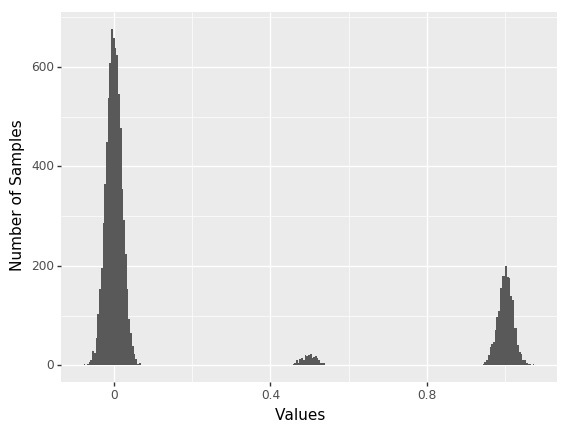

<ggplot: (-9223363263223181617)>

In [160]:
from plotnine import * 

x=chipseq_data['H3K4me3']
qplot(x=x,
      geom="histogram",
      xlab="Values",
      ylab="Number of Samples")

In [112]:
#Make a histogram of the H3K4me1 column 

/opt/conda/lib/python3.5/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/opt/conda/lib/python3.5/copy.py:292: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = callable(*args)
/opt/conda/lib/python3.5/site-packages/plotnine/facets/facet.py:151: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/opt/conda/lib/python3.5/site-packages/plotnine/stats/stat_bin.py:95: UserWarning: 'stat_bin()' using 'bins = 13'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/opt/conda/lib/python3.5/site-packages/plotnine/facets/layout.py:147: MatplotlibDeprecationWarning: The Bunch class was

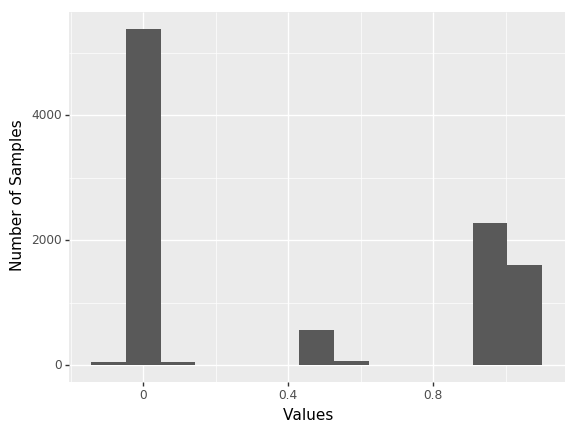

<ggplot: (-9223363263223234851)>

In [161]:
from plotnine import * 

x=chipseq_data['H3K4me1']
qplot(x=x,
      geom="histogram",
      xlab="Values",
      ylab="Number of Samples")

### Question 2e
What are the approximate possible values assigned for the histone markers?

**ANSWER HERE**
